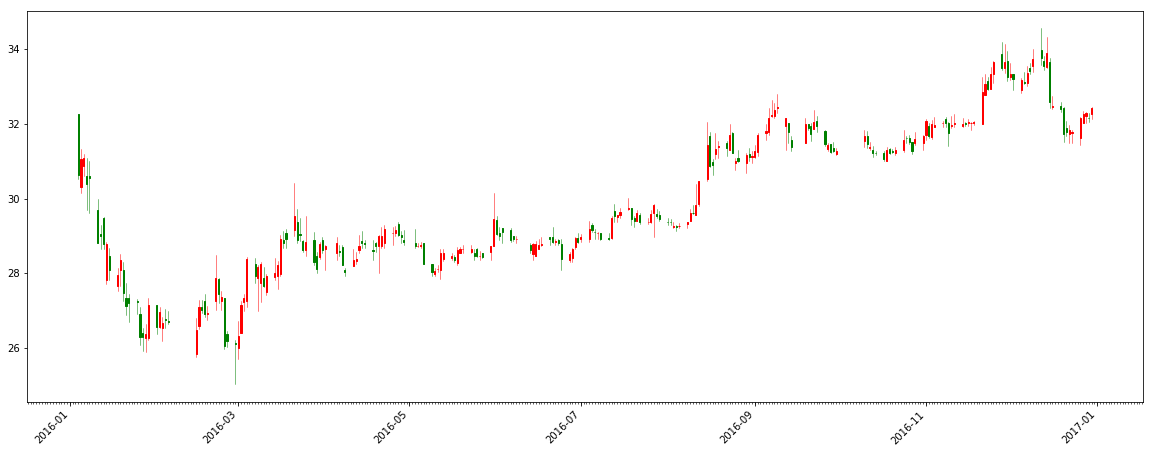

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY
import matplotlib.dates as mdates

def get_transform_data(path):
    df = pd.read_csv(path, index_col=0)
    df['date'] = pd.to_datetime(df['trade_date'], format='%Y%m%d')
    df.set_index('date', inplace=True)
    df = df.iloc[::-1]
    return df

def candlestick(df, start_date, end_date):
    start = pd.to_datetime(start_date, format='%Y%m%d')
    end = pd.to_datetime(end_date, format='%Y%m%d')
    df = df[(df.index >= start) & (df.index <= end)]
    
    mondays = WeekdayLocator(MONDAY)
    alldays = DayLocator()  
    dayFormatter = DateFormatter('%d')
    weekFormatter = DateFormatter('%b %d')
    fig, ax = plt.subplots(figsize=(20,8))
    fig.subplots_adjust(bottom=0.2)
    ax.xaxis.set_minor_locator(alldays)
    
    stock_array = np.array(df.reset_index()[['date','open','high','low','close']])
    stock_array[:,0] = mdates.date2num(stock_array[:,0])
    candlestick_ohlc(ax, stock_array, colorup = "red", colordown="green", width=0.4)
    
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

if __name__ == "__main__":
    
    stock_price = get_transform_data('../data/daily_price/601318.SH.csv')
    
    candlestick(stock_price, 20160101, 20161231)